Machine Learning Untuk Mendeteksi Bentuk Tangan (Batu,Gunting, Kertas) 

Nama : Tchaika Putri Ananda 

Email: tchaikaputri@gmail.com

Dataset: https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

# Import Library

In [ ]:
# Import tensorflow, zipfile, os

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os, shutil

# Download Dan Extract Dataset

In [ ]:
# Import/download file Dataset

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-27 05:20:29--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.34MB/s    in 83s     

2021-05-27 05:21:53 (3.69 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Extract file dataset

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Membuat Direktori / Folder

In [ ]:
# Membuat direktori utama

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

# Augmentasi Dan Split Dataset

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    zoom_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.4 # split dataset, validation set 40%
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    zoom_range=0.2,
    fill_mode = 'nearest',
    validation_split = 0.4
 )

In [ ]:
# persiapan data training
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),  
        shuffle = True,
        subset='training')

# persiapan data validasi
validation_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(150, 150),  
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Menggunakan Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print("\nAKURASI DIATAS 85%, TRAINING DIHENTIKAN!")
      self.model.stop_training = True

callbacks = myCallback()

# Membangun Dan Melatih Model

In [ ]:
# Membangun model

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
# Melatih model

history = model.fit(
    train_generator,
    steps_per_epoch= 41,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27,
    verbose = 2,
    callbacks = [callbacks]
)

Epoch 1/20
41/41 - 84s - loss: 1.1512 - accuracy: 0.3721 - val_loss: 1.0528 - val_accuracy: 0.4259
Epoch 2/20
41/41 - 82s - loss: 1.0799 - accuracy: 0.4493 - val_loss: 1.1866 - val_accuracy: 0.4537
Epoch 3/20
41/41 - 82s - loss: 0.9341 - accuracy: 0.5569 - val_loss: 0.7161 - val_accuracy: 0.7523
Epoch 4/20
41/41 - 82s - loss: 0.5742 - accuracy: 0.7683 - val_loss: 0.3657 - val_accuracy: 0.8727
Epoch 5/20
41/41 - 82s - loss: 0.4034 - accuracy: 0.8549 - val_loss: 0.2444 - val_accuracy: 0.9329
Epoch 6/20
41/41 - 82s - loss: 0.2941 - accuracy: 0.8877 - val_loss: 0.1813 - val_accuracy: 0.9444
Epoch 7/20
41/41 - 82s - loss: 0.2458 - accuracy: 0.9173 - val_loss: 0.1948 - val_accuracy: 0.9421
Epoch 8/20
41/41 - 83s - loss: 0.1764 - accuracy: 0.9459 - val_loss: 0.1588 - val_accuracy: 0.9595
Epoch 9/20
41/41 - 81s - loss: 0.1628 - accuracy: 0.9438 - val_loss: 0.1449 - val_accuracy: 0.9525
Epoch 10/20
41/41 - 81s - loss: 0.1608 - accuracy: 0.9431 - val_loss: 0.3050 - val_accuracy: 0.8947
Epoch 11/

# Melihat Loss Dan Accuracy Model

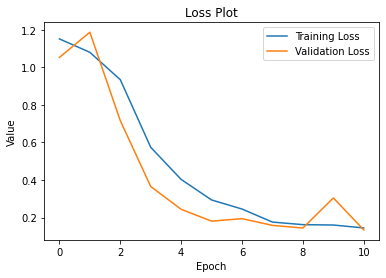

In [ ]:
# Melihat loss train dan validation

from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

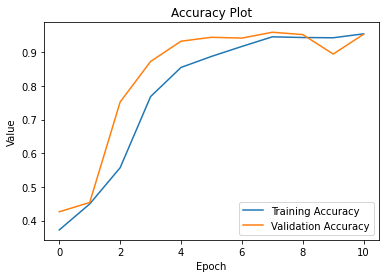

In [ ]:
# Melihat akurasi train dan validation

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# Memprediksi Gambar yang Diinput

Saving 1e1VCnCEApnFh9Oo.png to 1e1VCnCEApnFh9Oo.png
1e1VCnCEApnFh9Oo.png
Uploaded: ROCK


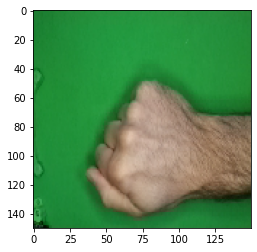

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('Uploaded: PAPER')
  elif classes[0,1]!=0:
    print('Uploaded: ROCK')
  else:
    print('Uploaded: SCISSORS')